# AMS 561 Homework 3

There are four problems for a total of 80 points.

This homework uses packages `numpy`, `scipy.linalg`, and matplotlib.pyplot.

In [138]:
from math import *

import math
import cmath
import numpy as np
from numpy import linalg
import scipy.linalg as la
import matplotlib.pyplot as plt

## Problem 1 (20 points)

The classic quadratic formula says that the two roots of the quadratic equation
$$ax^{2}+bx+c=0$$
are
$$x_1=\frac{-b+\sqrt{b^{2}-4ac}}{2a},\quad  x_2=\frac{-b-\sqrt{b^{2}-4ac}}{2a}.$$

(a) Write Python statements to compute the two roots for 
$$a=1, \quad b=-10^8, \quad c = 1.$$

In [57]:
a = 1.0
b = -1e8
c = 1.0

# Insert code here

#x1 = 0.0
x1 = (-b + sqrt((b**2) - (4*a*c)))/(2*a)
x2 = (-b - sqrt((b**2) - (4*a*c)))/(2*a)
print(x1, x2)

100000000.0 7.450580596923828e-09


(b) Compute reference solutions using the NumPy function [`numpy.roots`](https://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.roots.html) and display the errors of your solution against the reference solutions.

In [22]:
refs = np.roots([a,b,c])

# Insert code here to compute the errors

error1 = (abs(refs[0] - x1))/abs(refs[0])
error2 = (abs(refs[1] - x2))/abs(refs[1])
print(refs)
print(error1, error2)

[1.e+08 1.e-08]
0.3421772800000002 1.654361225106055e-16


You should find that the classic formula is good for computing one root but not the other.

(c) Mathematically, the two roots can also be computed using the following alternative formula:
$$x_1=\frac{2c}{-b-\sqrt{b^{2}-4ac}},\quad x_2=\frac{2c}{-b+\sqrt{b^{2}-4ac}}.$$
Use this alternative formula to compute both roots.

In [58]:
# Insert code here

x1 = (2*c)/(b - sqrt((b*b) - (4*a*c)))
x2 = (2*c)/(b + sqrt((b*b) - (4*a*c)))
print(x1, x2)

#the alternative formula is better because it can be used for a linear
#equation too wherein "a" can be zero 

-1e-08 -134217728.0


You should find that when the classic formula is bad for a root, the alternative formula is good for it.  Why is this happening?

**Answer:** [The alternative formula is better because it can be used for a linear equation too wherein "a" can be zero ]

(d) Finish the implementation of the function `quadratic_roots`, which should compute both roots accurately and can address the potential overflow and division by zero.

In [95]:
def quadratic_roots(a,b,c):
    '''
    Solution for Problem 1d
    [x1, x2] = quadratic_roots(a, b, c) 
    computes the two roots x1 and x2 of the quadratic equation a*x^2 + b*x + c = 0.

    TODO: This implementation computes just the classical formula. 
    Modify it to use a combination of the classic and the alternative 
    quadratic formulae. It should also take care of the potential 
    overflow and division by zero.
    '''
 
    if a > 0:
        if b == 0:
            x1 = cmath.sqrt(-4*a*c)/(2*a)
            x2 = (-cmath.sqrt(-4*a*c))/(2*a)
        else:
            t = cmath.sqrt(b**2 - 4*a*c)
            x1 = (-b + t)/(2*a)
            x2 = (-b - t)/(2*a)
    
    elif a == 0:
        if b == 0:
            x1, x2 = 0
        elif b > 0:
            t = cmath.sqrt(b**2 - 4*c)
            x1 = (-2*c)/(b + t)
            x2 = (-2*c)/(b - t)
        elif b < 0:
            t = cmath.sqrt(b**2 - 4*c)
            x1 = (2*c)/(b + t)
            x2 = (2*c)/(b - t)
    return (x1, x2)

Test your implementation with the following sets of values:
$$a=1.0, \quad b=10^8, \quad c = 1.0;$$

[Hint: be sure to use floating point values]

In [96]:
a = 1.0
b = 1e8
c = 1.0

# Insert code to compute errors against reference solutions
[x1, x2] = quadratic_roots(a, b, c);
print(x1, x2)

(-7.450580596923828e-09+0j) (-100000000+0j)


$$a = 1.0, \quad b = -1e5, \quad c=1.0;$$

In [98]:
[x1, x2] = quadratic_roots(1.0, -1e5, 1.0);
print(x1, x2)

(99999.99999+0j) (1.0000003385357559e-05+0j)


$$a=6\times 10^{154}, \quad b = 5\times 10^{154}, \quad c = -4\times 10^{154};$$

or in floating point notation

$$a = 6e154, \quad b = 5e154, \quad c = -4e154$$

In [99]:
[x1, x2] = quadratic_roots(6e153, 5e153, -4e153);
print(x1, x2)

(0.5+0j) (-1.3333333333333333+0j)


$$a = 0.0, \quad b = 1.0, \quad c=1.0$$

In [100]:
[x1, x2] = quadratic_roots(0.0, 1.0, 1.0);
print(x1, x2)

(-0.5000000000000001+0.8660254037844387j) (-0.5000000000000001-0.8660254037844387j)


## Problem 2 (20 points)

The following is a Python function `forward` for solving a linear system $Lx=b$, where $L$ is lower triangular, i.e., 
$$
L=\left[\begin{array}{cccc}
\ell_{11} & 0 & \cdots & 0\\
\ell_{21} & \ell_{22} & \ddots & \vdots\\
\vdots & \vdots & \ddots & 0\\
\ell_{n1} & \ell_{n2} & \cdots & \ell_{nn}
\end{array}\right].
$$

The matrix is said to be *unit lower triangular* all the diagonal entries are all 1.

In [50]:
def forward(L, b):
    '''
    L is a numpy lower triangular square matrix
    b is a numpy vector
    
    return x the solution of L x = b
    '''

    n, m = L.shape
    if n != m: 
        raise ValueError # must be square
    if n != b.shape[0]:
        raise ValueError # matrix and vector must be same size
    
    x = np.copy(b)
    for i in range(n):
        for j in range(i):
            x[i] = x[i] - L[i,j]*x[j]
        x[i] = x[i]/L[i,i]

    return x

(a) Verify the correctness of the above function by generating some random lower-triangular matrices $L$, solving $Lx=b$ against the vector $b$ composed of all ones, and checking the residual $b-Lx$.

In [171]:
n = np.random.randint(3,7) #generating a random size for the array
a = np.random.randint(20, size=(n, n)) #generating a random array with a max value of 20
L = np.tril(a) #extracting a lower triangular matrix from matrix "a"
#making all the diagonal elements of the matrix 1
for i in range(0, n):
    L[i,i] = 1

b = np.ones((n, 1))
print('L= ', L)
print('b= ', b)

x = forward_vectorized(L, b);
print('X =', x)

mul = np.dot(L, x)
print('Lx = ', mul)
residual = b - mul
print('Residual =',residual)
#matrix size greater than 3 does not give accurate answer

L=  [[ 1  0  0  0  0  0]
 [12  1  0  0  0  0]
 [ 3 11  1  0  0  0]
 [15 15  2  1  0  0]
 [10 14  5 13  1  0]
 [18 10  5 14  6  1]]
b=  [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
X = [[ 1.00e+00]
 [-1.10e+01]
 [ 1.19e+02]
 [-8.70e+01]
 [ 6.81e+02]
 [-3.37e+03]]
Lx =  [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
Residual = [[-1.57651669e-14]
 [ 2.39808173e-13]
 [-5.68434189e-14]
 [ 5.68434189e-14]
 [-3.41060513e-13]
 [-4.54747351e-13]]


(b) Rewrite the function to vectorize the inner loop using the `dot` function, instead of using an explicit loop on $j$. Verify your implementation using the same strategy as for part (a).

In [149]:
def forward_vectorized(L,b):
    '''
    L is a numpy lower triangular square matrix
    b is a numpy vector
    
    return x the solution of L x = b
    '''

    n, m = L.shape
    if n != m: 
        raise ValueError # must be square
    if n != b.shape[0]:
        raise ValueError # matrix and vector must be same size
    
    x = np.copy(b)
    I = np.ones((n,1))
    Linv = np.linalg.inv(L)
#    Linv = L*I
    x = np.dot(Linv,b)
    
    return x

(c) Construct some random **unit** lower-triangular matrices of sizes of $n=2^5,2^6,\cdots,2^{12}$ and then measure the runtimes of solving them using your `forward_vectorized` function. Plot the runtimes against $n$ in logarithmic scale. 

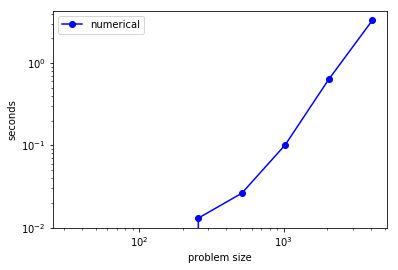

In [177]:
import time

pmin = 5
pmax = 13
times = np.empty(pmax-pmin)
ns = 2**np.array(range(pmin, pmax))

for i,n in enumerate(ns):
    a = np.random.randint(20, size=(n, n))
    L = np.tril(a) 
    for j in range(0, n):
        L[j,j] = 1
    b = np.dot(L, np.ones(n))
    
    start = time.time()
    x = forward_vectorized(L, b)
    end = time.time()
    times[i] = end - start

plt.loglog(ns, times, 'b-o', label='numerical')
plt.xlabel('problem size')
plt.ylabel('seconds')
plt.legend(loc=2)
    

(d) Use the `forward_vectorized` function to compute $L^{-1}$ by letting the right-hand side vector $b$ to be the $n\times n$ identity matrix $I$. Measure the runtimes for $n=2^5,2^6,\cdots,2^{12}$ and plot the runtimes against $n$ in logarithmic scale.

(e) Explain the differences in runtimes in (c) and (d) by analyzing their respective numbers of floating-point operations using the big-$\mathcal{O}$ notation.

**Answer**: [Type your answer here.]

## Problem 3 (20 points)


<!-- # Linear Algebra problem -->



Given a set of $m$ data points $\{t_i, f_i\}$, we can construct a degree-$(n-1)$ polynomial to fit the data points by solving an $m\times n$ linear system or a least-squares problem

$$
\boldsymbol{A}\boldsymbol{x} = 
\left[\begin{array}{cccc}
1 & t_1 & \cdots & t_1^{n-1} \\
1 & t_2 & \cdots & t_2^{n-1} \\
\vdots & \vdots & \ddots & \vdots\\
1 & t_m & \cdots & t_m^{n-1}
\end{array}\right]
\left[\begin{array}{c}
c_0 \\
c_1 \\
\vdots\\
c_{n-1}
\end{array}\right]
\approx 
\left[\begin{array}{c}
f_1 \\
f_2 \\
\vdots\\
f_m
\end{array}\right]
=
\boldsymbol{b}.
$$

The matrix $\boldsymbol{A}$ above is known as the *Vandermonde matrix*.

We will test it using Runge's function $f(t) = 1/(1+25 t^2)$.

(a) Write a function to generate an $m$-vector containing equally spaced points $t_i$ over the interval $[-1, 1]$, including the end-nodes, and an $m$-vector $b$ containing components $b_i=f(t_i)$. You may use the function `numpy.linspace`. Your function should be properly vectorized, without using loops.

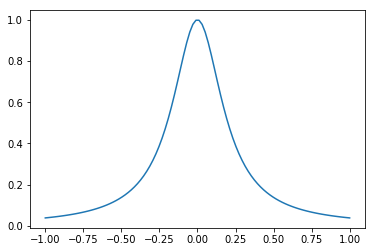

In [188]:
def runge(ts):
    bs = 1/(1 + (25*(ts**2)))
    return bs

xs = np.linspace(-1, 1, 100)
ys = runge(xs)
plt.plot(xs, ys)

(b) Write a function to generate the Vandermonde matrix for $m$ input points for a degree-$(n-1)$ polynomial. You may use the multiplication operator `*`. Do not use the built-in `scipy.vander` function or the power `**` operator. To get full credit, your function should take $\mathcal{O}(mn)$ multiplications instead of $\mathcal{O}(mn^2)$ multiplications.

In [189]:
def vander(xs, n=None):

    if n is None:
        n = xs.shape[0]
        print(n)
        
    V = np.zeros((xs.shape[0], n))
    V[:,0] = 1    
    for i in range(n):
        for j in range(n):
            V[i,j] = pow(xs[i], j)        
    return V
      
m = 4
ts = np.linspace(-1, 1, m)
    
V = vander(ts)
print(V)

4
[[ 1.         -1.          1.         -1.        ]
 [ 1.         -0.33333333  0.11111111 -0.03703704]
 [ 1.          0.33333333  0.11111111  0.03703704]
 [ 1.          1.          1.          1.        ]]


(c) Use the `numpy.linalg.cond` function to compute the condition numbers of the Vandermonde systems in $\infty$-norm for $n=2, 3, \cdots, 20$. Plot the condition numbers with respect to $n$ with $m=n$ and $m=2n$ in two separate curves.

[[ 1. -1.]
 [ 1.  1.]]
1.0000000000000004
[[ 1. -1.  1.]
 [ 1.  0.  0.]
 [ 1.  1.  1.]]
3.2255049266776945
[[ 1.         -1.          1.         -1.        ]
 [ 1.         -0.33333333  0.11111111 -0.03703704]
 [ 1.          0.33333333  0.11111111  0.03703704]
 [ 1.          1.          1.          1.        ]]
8.011561047197164
[[ 1.     -1.      1.     -1.      1.    ]
 [ 1.     -0.5     0.25   -0.125   0.0625]
 [ 1.      0.      0.      0.      0.    ]
 [ 1.      0.5     0.25    0.125   0.0625]
 [ 1.      1.      1.      1.      1.    ]]
23.53090873165756
[[ 1.000e+00 -1.000e+00  1.000e+00 -1.000e+00  1.000e+00 -1.000e+00]
 [ 1.000e+00 -6.000e-01  3.600e-01 -2.160e-01  1.296e-01 -7.776e-02]
 [ 1.000e+00 -2.000e-01  4.000e-02 -8.000e-03  1.600e-03 -3.200e-04]
 [ 1.000e+00  2.000e-01  4.000e-02  8.000e-03  1.600e-03  3.200e-04]
 [ 1.000e+00  6.000e-01  3.600e-01  2.160e-01  1.296e-01  7.776e-02]
 [ 1.000e+00  1.000e+00  1.000e+00  1.000e+00  1.000e+00  1.000e+00]]
63.82728259639307
[[ 

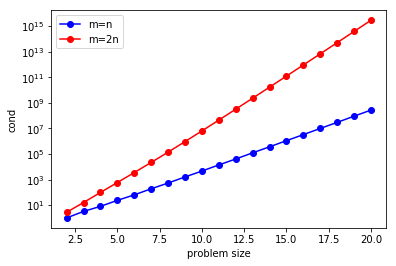

In [191]:
start = 2
N = 21

ns = range(start, N)
conds1 = np.zeros(N-start)

for i, n in enumerate(ns):
    ts = np.linspace(-1, 1, n)
    V = vander(ts, n)
    print(V)
    conds1[i] = np.linalg.cond(V, p=2)
    print(conds1[i])
    
plt.semilogy(ns, conds1, 'b-o', label='m=n')
    
conds2 = np.zeros(N-start)
for i, n in enumerate(ns):
    ts = np.linspace(-1, 1, (2*n))
    V = vander(ts, n)
    print(V)
    conds2[i] =  np.linalg.cond(V, p=2)
    print(conds2[i])

plt.semilogy(ns, conds2, 'r-o', label='m=2n')

plt.xlabel('problem size')
plt.ylabel('cond')
plt.legend(loc=2)

(d) Construct polynomial interpolations for $n=5, 10, 15, 20$ and $m=n$ by solving their corresponding linear systems using `scipy.linalg.solve`. Plot the reconstructed polynomials against Runge's function. Comment on the general trend of the condition numbers from (c) versus the reliability of the fittings.

[[ 1.     -1.      1.     -1.      1.    ]
 [ 1.     -0.5     0.25   -0.125   0.0625]
 [ 1.      0.      0.      0.      0.    ]
 [ 1.      0.5     0.25    0.125   0.0625]
 [ 1.      1.      1.      1.      1.    ]]
[[ 1.00000000e+00 -1.00000000e+00  1.00000000e+00 -1.00000000e+00
   1.00000000e+00 -1.00000000e+00  1.00000000e+00 -1.00000000e+00
   1.00000000e+00 -1.00000000e+00]
 [ 1.00000000e+00 -7.77777778e-01  6.04938272e-01 -4.70507545e-01
   3.65950312e-01 -2.84628021e-01  2.21377350e-01 -1.72182383e-01
   1.33919631e-01 -1.04159713e-01]
 [ 1.00000000e+00 -5.55555556e-01  3.08641975e-01 -1.71467764e-01
   9.52598689e-02 -5.29221494e-02  2.94011941e-02 -1.63339967e-02
   9.07444263e-03 -5.04135702e-03]
 [ 1.00000000e+00 -3.33333333e-01  1.11111111e-01 -3.70370370e-02
   1.23456790e-02 -4.11522634e-03  1.37174211e-03 -4.57247371e-04
   1.52415790e-04 -5.08052634e-05]
 [ 1.00000000e+00 -1.11111111e-01  1.23456790e-02 -1.37174211e-03
   1.52415790e-04 -1.69350878e-05  1.88167642e-06 

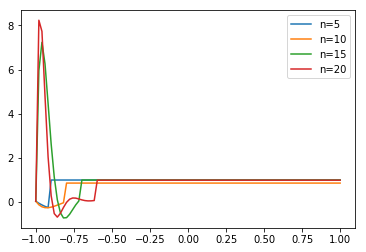

In [192]:
ns = [5, 10, 15, 20]

xs = np.linspace(-1, 1, 100)

for i, n in enumerate(ns):
    # TODO: compute ts, V, right-hand side fs, and coefficients cs
    ts = np.linspace(-1, 1, n)
    V = vander(ts, n)
    print(V)
    fs = 1/(1 + (25*(ts**2)))
    cs = la.solve(V, fs)
    #print(cs)

    # Plot the interpolated function
    ys = np.dot(vander(xs, n), cs)
    plt.plot(xs, ys, label="n="+str(n))
    
plt.legend()

(e) Solve the same problem as in (d) but let $m=2n$ to construct least squares fits by solving the least squares problems using `scipy.linalg.lstsq`. Plot the reconstructed polynomials. Did using least squares improve the reliability of the fittings? Why or why not?

In [193]:
ns = [5, 10, 15, 20]

xs = np.linspace(-1, 1, 100)

for i, n in enumerate(ns):
    # TODO: compute ts, V, right-hand side fs, and coefficients cs
    ts = np.linspace(-1, 1, (2*n))
    V = vander(ts, n)
    print(V)
    fs = 1/(1 + (25*(ts**2)))
    cs = la.lstsq(V, fs)
    #print(cs)

    # Plot the interpolated function
    ys = np.dot(vander(xs, n), cs) #this line of code is giving an error that i wasnt able to resolve even though its the same line i used in the (d) part
    plt.plot(xs, ys, label="n="+str(n))
    
plt.legend()

[[ 1.00000000e+00 -1.00000000e+00  1.00000000e+00 -1.00000000e+00
   1.00000000e+00]
 [ 1.00000000e+00 -7.77777778e-01  6.04938272e-01 -4.70507545e-01
   3.65950312e-01]
 [ 1.00000000e+00 -5.55555556e-01  3.08641975e-01 -1.71467764e-01
   9.52598689e-02]
 [ 1.00000000e+00 -3.33333333e-01  1.11111111e-01 -3.70370370e-02
   1.23456790e-02]
 [ 1.00000000e+00 -1.11111111e-01  1.23456790e-02 -1.37174211e-03
   1.52415790e-04]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]]


ValueError: setting an array element with a sequence.

## Problem 4 (20 points)

<!-- application of least squares -->
A planet follows an elliptical orbit, which can be expressed in a Cartesian $(x,y)$ coordinate system by the equation 
$$a y^2 + bxy + cx + dy + e = x^2.$$

(a) Use the `scipy.linalg.lstsq` function to determine the orbital parameters $a$, $b$, $c$, $d$, and $e$, given the following observations of the planet's position:

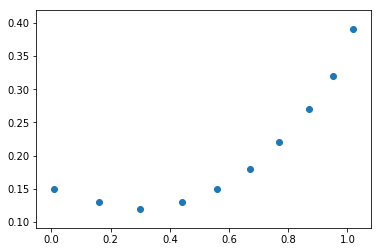

In [194]:
xs = np.array([1.02, 0.95, 0.87, 0.77, 0.67, 0.56, 0.44, 0.30, 0.16, 0.01])
ys = np.array([0.39, 0.32, 0.27, 0.22, 0.18, 0.15, 0.13, 0.12, 0.13, 0.15])

plt.scatter(xs, ys)

In addition to printing the values for the orbital parameters, plot the resulting orbit and the given data points in the $(x,y)$ plane.

(array([[0.03455972],
       [0.06907399],
       [0.19767885],
       [0.04998776],
       [0.22721707]]), array([], dtype=float64), 1, array([4.38275075e+00, 2.03733648e-16, 6.40397436e-32, 4.37546944e-48,
       0.00000000e+00]))


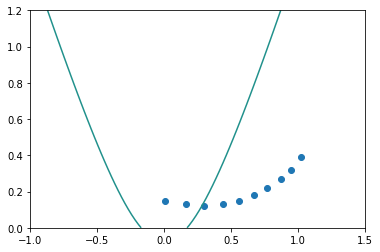

In [235]:
def fit_ellipse(xs, ys):

    A = np.empty((10,5))
    b = np.empty((10,1))
    l = len(xs)
    for i in range(l):
        if i == 0:
            A[:,i] = ys[i]**2
        elif i == 1:
            A[:,i] = ys[i]*xs[i]
        elif i == 2:
            A[:,i] = xs[i]
        elif i == 3:
            A[:,i] = ys[i]
        elif i == 4:
            A[:,i] = 1  
    for j in range(l):
        b[j,:] = xs[j]**2
    
    cs = la.lstsq(A, b)
    return cs

cs = fit_ellipse(xs, ys)
print(cs)

xrange = np.linspace(-1, 1.5, 100)
yrange = np.linspace(0, 1.2, 100)
X, Y = np.meshgrid(xrange, yrange)
cs = fit_ellipse(xs, ys)
F = []
G = []
for i in range(len(xrange)):
    F.append(cs[0][0] * yrange[i] ** 2 + cs[0][1] * xrange[i] * yrange[i] + cs[0][2] * xrange[i] + cs[0][3] * yrange[i] + cs[0][4] * xrange[i] ** 0)
    G.append(xrange[i] ** 2)

F = np.array(F)
G = np.array(G)
plt.contour(X, Y, F-G, 0)
plt.scatter(xs, ys)


(b) This least squares problem is nearly rank deficient, so it is very sensitive to perturbation. To see what effect this has on the solution, perturb the input data slight by adding to each coordinate of each data point a random number uniformally distributed on the interval $[-0.005, 0.005]$ and solve the least squares problem with the perturbed data. Compare the new values for the parameters with those previously computed.

(array([[0.03433385],
       [0.06850754],
       [0.19632922],
       [0.04967613],
       [0.2263383 ]]), array([], dtype=float64), 1, array([4.37630368e+00, 3.48221332e-16, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00]))


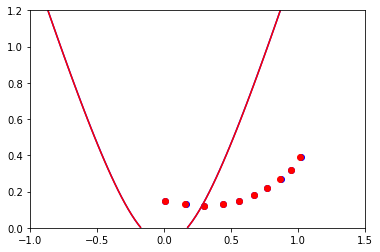

In [238]:
import random
# TODO: add noise to xs and ys
xs_noisy = xs + random.uniform(-0.005, 0.005)
ys_noisy = ys + random.uniform(-0.005, 0.005)

cs_noisy = fit_ellipse(xs_noisy, ys_noisy)
print(cs_noisy)

xrange = np.linspace(-1, 1.5, 100)
yrange = np.linspace(0, 1.2, 100)
X, Y = np.meshgrid(xrange, yrange)

F_noisy = []
G_noisy = []
for i in range(len(xrange)):
    F_noisy.append(cs_noisy[0][0] * yrange[i] ** 2 + cs_noisy[0][1] * xrange[i] * yrange[i] + cs_noisy[0][2] * xrange[i] + cs_noisy[0][3] * yrange[i] + cs_noisy[0][4] * xrange[i] ** 0)
    G_noisy.append(xrange[i] ** 2)

F_noisy = np.array(F_noisy)
G_noisy = np.array(G_noisy)


plt.contour(X, Y, F-G, 0, colors='b')
plt.scatter(xs, ys, color='blue')

plt.contour(X, Y, F_noisy-G_noisy, 0, colors='r')
plt.scatter(xs_noisy, ys_noisy, color='red')